# Übung: Klassifikation mit K-Nearest Neighbors (KNN)
**Ziel:**
In dieser Übung lernen Sie, den KNN-Algorithmus zur Klassifikation einzusetzen. Sie laden einen Datensatz, erkunden ihn, trainieren ein Modell, experimentieren mit Parametern und visualisieren die Ergebnisse. Am Ende reflektieren Sie Ihre Erkenntnisse.

**Dauer:** ca. 30 Minuten

**Voraussetzungen:**
- Python-Grundkenntnisse
- scikit-learn, pandas, matplotlib installiert

## 1. Problemstellung
Stellen Sie sich vor, Sie arbeiten in einem Projekt, in dem Sie anhand von Messwerten die Art von Blüten (z. B. Iris-Setosa, Iris-Versicolor, Iris-Virginica) klassifizieren sollen. Dazu nutzen Sie den bekannten Iris-Datensatz.

**Ihre Aufgaben:**
1. Daten laden und erkunden
2. KNN-Modell aufbauen
3. Parameter (z. B. Anzahl Nachbarn) untersuchen
4. Ergebnisse visualisieren
5. Reflexion: Welchen Einfluss haben Parameter?

## 2. Vorbereitung: Daten und Bibliotheken
Importieren Sie die notwendigen Pakete und laden Sie den Iris-Datensatz.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Laden des Iris-Datensatzes
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map(lambda i: iris.target_names[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Aufgabe 1:
- Untersuchen Sie die Struktur des DataFrames (`df.head()`, `.info()`, `.describe()`).
- Wie viele Beispiele hat jede Art von Blüte? Verwenden Sie `value_counts()`.

### Lösung Aufgabe 1
- `df.info()` zeigt 150 Einträge, 6 Spalten (index + 4 Features + target)
- `df.describe()` liefert Mittelwert, Standardabweichung, Min/Max für jede Messgröße
- Jede Art (Setosa, Versicolor, Virginica) hat jeweils 50 Beispiele

## 3. Datenteilung und erstes Modell
Teilen Sie die Daten in Trainings- und Testset auf.

In [7]:
# Features und Ziel setzen
X = df[iris.feature_names]
y = df['target']

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Aufgabe 2:
- Warum ist `stratify=y` bei Klassifikationsproblemen sinnvoll?
- Überlegen Sie, was passieren kann, wenn der Datensatz nicht gleichverteilt im Testset ist.


### Lösung Aufgabe 2
- `stratify=y` sorgt für gleiche Verteilung der Klassen in Train/Test. Ohne stratify könnten z.B. zu wenige Beispiele einer Klasse im Test landen und die Bewertung verzerrt sein.


## 4. KNN-Training mit Standardparametern
Trainieren Sie ein KNN-Modell mit `n_neighbors=5` und bewerten Sie die Leistung.

In [8]:
# Modell erstellen und trainieren
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Vorhersagen und Bewertung
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9777777777777777
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Aufgabe 3:
- Erweitern Sie den code, sodass die Accuracy, die Confusion Matrix und ein Classification Report erstellt wird. Verwenden Sie dafür sklearn.
- Interpretieren Sie Accuracy, Konfusionsmatrix und den Classification Report.
- Wo liegen Stärken und Schwächen des Modells?

### Lösung Aufgabe 3
- Typischerweise liegt Accuracy um ~0.98
- Konfusionsmatrix zeigt z.B. seltene Verwechslung zwischen Versicolor und Virginica
- Precision/Recall jeweils sehr hoch, Modell ist gut für Iris-Daten


## 5. Parameter-Experiment: Wahl von k
Führen Sie eine GridSearch (`GridSearchCV`) durch, um den besten Wert für `n_neighbors` zu finden. Nutzen Sie Werte von 1 bis 15.


Beste Parameter: {'n_neighbors': 9}
Beste Cross-Validation Accuracy: 0.980952380952381


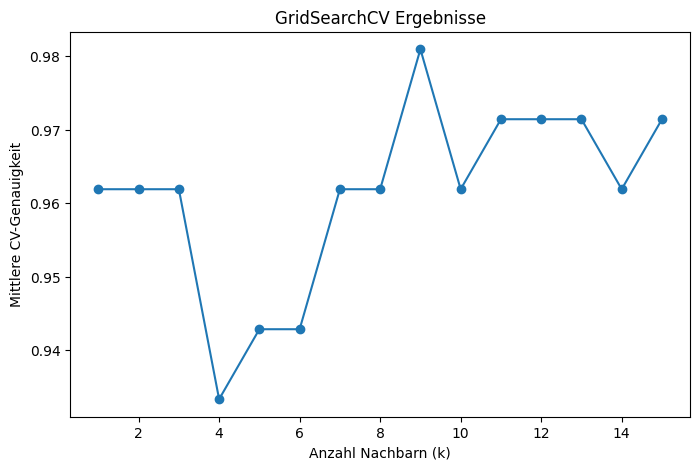

In [9]:
param_grid = {'n_neighbors': list(range(1, 16))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Beste Parameter:", grid.best_params_)
print("Beste Cross-Validation Accuracy:", grid.best_score_)

# Plotten des Erfolgs in Abhängigkeit von k
results = pd.DataFrame(grid.cv_results_)[['param_n_neighbors', 'mean_test_score']]
plt.figure(figsize=(8,5))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Anzahl Nachbarn (k)')
plt.ylabel('Mittlere CV-Genauigkeit')
plt.title('GridSearchCV Ergebnisse')
plt.show()

### Aufgabe 4:
- Warum kann ein zu kleines oder zu großes k problematisch sein? (Bias-Varianz-Dilemma)
- Welchen k würden Sie in der Praxis wählen und warum?

### Lösung Aufgabe 4
- Zu kleines k führt zu hoher Varianz, zu großes zu hohem Bias


## 6. Visualisierung der Entscheidungsgrenzen
Für zwei ausgewählte Merkmale (z. B. Sepal-Länge vs. Sepal-Breite) visualisieren Sie die Entscheidungsgrenzen des KNN-Modells.


/Users/nils/projects/fom/repos/exercise-fom-ai-bi/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


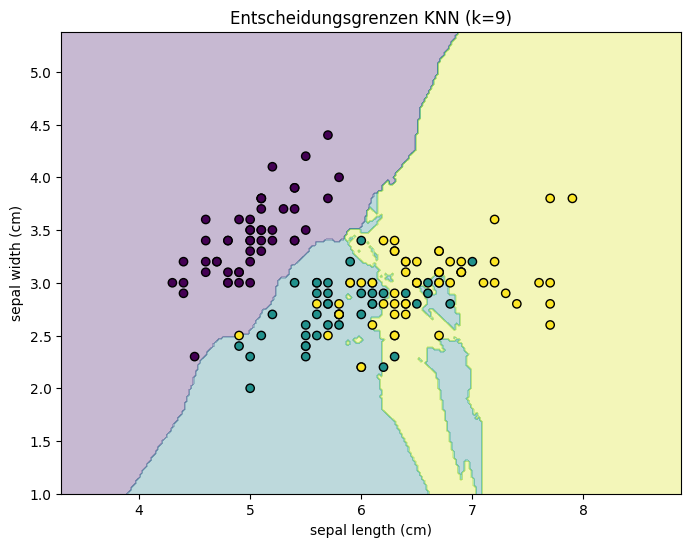

In [10]:
# Merkmale auswählen
feature_idx = [0, 1]  # Sepal-Länge, Sepal-Breite
X2 = X.iloc[:, feature_idx]
labels = iris.target_names

# Neues Modell mit bestem k
best_k = grid.best_params_['n_neighbors']
knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X2, y)

# Meshgrid erstellen
ih = 0.02  # Schrittweite im Mesh
x_min, x_max = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
y_min, y_max = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, ih),
    np.arange(y_min, y_max, ih)
)

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y, edgecolor='k')
plt.xlabel(iris.feature_names[feature_idx[0]])
plt.ylabel(iris.feature_names[feature_idx[1]])
plt.title(f'Entscheidungsgrenzen KNN (k={best_k})')
plt.show()

### Aufgabe 5:
- Interpretieren Sie die Visualisierung. Welche Regionen werden welchen Klassen zugeordnet?
- Experimentieren Sie: Wie ändern sich die Grenzen bei anderen Werten von k?

### Lösung Aufgabe 5
- Jede Farbe zeigt den Bereich, den KNN einer Klasse zuordnet
- Mit größerem k werden die Grenzen glatter, kleine k erzeugt komplexe, überangepasste Linien (k=1, k=25, K=50)

## 7. Reflexion und Weiterführende Aufgaben
- Fassen Sie Ihre Erkenntnisse zusammen: Wie wirkt sich k auf Overfitting bzw. Underfitting aus?

### Lösung
- **Einfluss von k:** Kleines k → Overfitting, großes k → Underfitting